# Export VE Data as DataFrame for LME Cue Analysis

In [1]:
import csv
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# residuals, clutter, complete ground plane, viewing duration, stimulus 

In [3]:
dpath = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# dpath = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/'

# stim 
with open(dpath + 'z_final_stim_125.npy' , 'rb') as f:
    stim_125 = np.load(f, allow_pickle=True)
    
with open(dpath + 'z_final_stim_250.npy' , 'rb') as f:
    stim_250 = np.load(f, allow_pickle=True)

with open(dpath + 'z_final_stim_1000.npy' , 'rb') as f:
    stim_1000 = np.load(f, allow_pickle=True)
    
# residuals
with open(dpath + 'residuals/'+ 'z_residuals_125.npy' , 'rb') as f:
    residuals_125 = np.load(f, allow_pickle=True)
with open(dpath + 'residuals/'+ 'z_residuals_250.npy' , 'rb') as f:
    residuals_250 = np.load(f, allow_pickle=True) 
with open(dpath + 'residuals/'+ 'z_residuals_1000.npy' , 'rb') as f:
    residuals_1000= np.load(f, allow_pickle=True)
    
# difference between z-scored estimate and z-scored actual depth
with open(dpath + '/diff_125.npy' , 'rb') as f:
    diff_125 = np.load(f, allow_pickle=True)
with open(dpath + '/diff_250.npy' , 'rb') as f:
    diff_250 = np.load(f, allow_pickle=True) 
with open(dpath + '/diff_1000.npy' , 'rb') as f:
    diff_1000= np.load(f, allow_pickle=True)
    
# difference between raw estimate and raw actual depth
# with open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/raw' + '/raw_diff_125.npy' , 'rb') as f:
#     raw_diff_125 = np.load(f, allow_pickle=True)
# with open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/raw' + '/raw_diff_250.npy' , 'rb') as f:
#     raw_diff_250 = np.load(f, allow_pickle=True) 
# with open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/raw' + '/raw_diff_1000.npy' , 'rb') as f:
#     raw_diff_1000= np.load(f, allow_pickle=True)

In [4]:
# path = '/Users/pmahableshwarkar/Documents/Depth_Project/SUN_scene_cue_coding/GP_size_dict.json'
path = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/SUN_scene_cue_coding/GP_size_dict.json'

gp_size_dict = json.load(open(path))

# Find GP or VGP Outliers 

gpsize_list = [[key, gp_size_dict[key]] for key in gp_size_dict]
gpsize_mean = np.mean(np.array([elem[1] for elem in gpsize_list]))
gpsize_std = np.std(np.array([elem[1] for elem in gpsize_list]))

gpsize_outlierRange = [gpsize_mean - (3*gpsize_std), gpsize_mean + (3*gpsize_std)]

cleaned_gpsize_dict = {}
for key in gp_size_dict:
    if gpsize_outlierRange[0] < gp_size_dict[key] < gpsize_outlierRange[1]:
        cleaned_gpsize_dict[key] = gp_size_dict[key]
    else:
        print(key, 'excluded')
        
ordered_gp_size = []
gp_none = 0


for folder in [elem.split('/')[1][:-2] for elem in stim_250]:
    try:
        ordered_gp_size.append(cleaned_gpsize_dict[folder])
    except:
        gp_none += 1
        ordered_gp_size.append(None)

002118_2014-06-25_20-32-08_260595134347_rgbf000078-resize excluded
002657_2014-06-13_15-29-54_094959634447_rgbf000150-resize excluded


In [5]:
len(cleaned_gpsize_dict)

149

In [6]:
# Opening JSON file
f = open('/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/cue_analyses/cleaned_globalClutter.json')
# f = open('/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/cue_analyses/cleaned_globalClutter.json')
  
# returns JSON object as 
# a dictionary
cleaned_globalClutter = json.load(f)

In [7]:
len(cleaned_globalClutter)

140

In [8]:
globalClutter = []

completeGP = []

trunc_residuals_125 = []
trunc_residuals_250 = []
trunc_residuals_1000 = []

stimulus = []

for stim in cleaned_globalClutter:
    if stim in list(cleaned_gpsize_dict.keys()):
        index_125 = [elem.split('/')[1][:-2] for elem in stim_125].index(stim)
        index_250 = [elem.split('/')[1][:-2] for elem in stim_250].index(stim)
        index_1000 = [elem.split('/')[1][:-2] for elem in stim_1000].index(stim)
        
        trunc_residuals_125.append(residuals_125[index_125])
        trunc_residuals_250.append(residuals_250[index_250])
        trunc_residuals_1000.append(residuals_1000[index_1000])
        
        globalClutter.append(cleaned_globalClutter[stim])
        completeGP.append(cleaned_gpsize_dict[stim])
        
        stimulus.append(stim)
        
    
len(trunc_residuals_125), len(trunc_residuals_250), len(trunc_residuals_1000), len(globalClutter), len(completeGP), len(stimulus)

(113, 113, 113, 113, 113, 113)

In [9]:
len([125] * len(trunc_residuals_125))

113

In [10]:
len(np.concatenate((np.abs(np.array(trunc_residuals_125)), np.abs(np.array(trunc_residuals_250)), np.abs(np.array(trunc_residuals_1000))), axis=0),)

339

In [11]:
# initialize data of lists.
data = {'residuals': trunc_residuals_125+trunc_residuals_250+trunc_residuals_1000,
        'abs_residuals': np.concatenate((np.abs(np.array(trunc_residuals_125)), np.abs(np.array(trunc_residuals_250)), np.abs(np.array(trunc_residuals_1000))), axis=0),
        'duration': [125] * len(trunc_residuals_125) + [250] * len(trunc_residuals_250) + [1000] * len(trunc_residuals_1000),
        'groundPlane': completeGP * 3,
        'clutter': globalClutter * 3,
        'stimulus': stimulus * 3}
  
# Create DataFrame
df = pd.DataFrame(data)
df

,residuals,abs_residuals,duration,groundPlane,clutter,stimulus
0,-0.099975,0.099975,125,8.082259,3,000866_2014-06-09_20-45-42_260595134347_rgbf00...
1,0.080464,0.080464,125,10.664824,19,003070_2014-06-15_14-58-27_094959634447_rgbf00...
2,-0.301428,0.301428,125,9.164038,11,001092_2014-06-15_17-34-58_260595134347_rgbf00...
3,-0.075657,0.075657,125,10.409246,14,002272_2014-06-28_18-53-56_260595134347_rgbf00...
4,-0.164808,0.164808,125,31.362143,23,000642_2014-06-08_16-59-25_260595134347_rgbf00...
...,...,...,...,...,...,...
334,0.084265,0.084265,1000,17.196771,12,001094_2014-06-15_17-36-00_260595134347_rgbf00...
335,0.127303,0.127303,1000,20.030652,24,001808_2014-06-26_20-50-58_260595134347_rgbf00...
336,0.341774,0.341774,1000,11.913177,14,000758_2014-06-08_22-05-08_260595134347_rgbf00...
337,0.322175,0.322175,1000,5.576512,7,000878_2014-06-08_22-52-45_260595134347_rgbf00...


In [12]:
np.std(np.array(df['residuals'])), np.std(np.array(df['duration'])), np.std(np.array(df['clutter'])), np.std(np.array(df['groundPlane']))


(0.3230816540755546, 386.40077064565435, 7.3032069249418825, 8.380988898546363)

In [13]:
df.to_csv('data_for_lme.csv', index=False)

# Add Participant Residuals

In [109]:
# p = '/Users/pmahableshwarkar/Documents/Depth_Project/verbal_judgement_analysis/data/finalVEMatched/z_scored/residuals/participant_residuals.csv'
p = '/Users/prachimahableshwarkar/Documents/GW/Depth_MTurk/verbal_judgement_analysis/data/finalVEMatched/z_scored/residuals/participant_residuals.csv'

p_data = pd.read_csv(p) 
p_stimuli = list(p_data.stimulus.unique())


In [110]:
p_data

,subjID,duration,s_residual,abs_s_residual,stimulus,error,abs_error,actual_depth
0,541423.0,125,0.906977,0.906977,001808_2014-06-26_20-50-58_260595134347_rgbf00...,-2.759331,2.759331,4.2490
1,541423.0,125,1.590297,1.590297,001815_2014-06-26_20-52-55_260595134347_rgbf00...,-1.635132,1.635132,3.3865
2,541423.0,125,-0.355174,0.355174,001029_2014-06-08_13-17-57_260595134347_rgbf00...,-3.425721,3.425721,3.0835
3,541423.0,125,-0.847848,0.847848,000677_2014-06-08_23-10-32_260595134347_rgbf00...,-4.159920,4.159920,3.5560
4,541423.0,125,-0.403006,0.403006,002118_2014-06-25_20-32-08_260595134347_rgbf00...,-3.249920,3.249920,2.6460
...,...,...,...,...,...,...,...,...
71127,351649.0,250,0.593507,0.593507,002875_2014-06-01_15-19-00_094959634447_rgbf00...,-1.945729,1.945729,1.9675
71128,351649.0,250,-0.542151,0.542151,001092_2014-06-15_17-34-58_260595134347_rgbf00...,-3.426449,3.426449,2.6935
71129,351649.0,250,-0.513911,0.513911,002545_2014-06-24_13-38-53_094959634447_rgbf00...,-3.030808,3.030808,1.9205
71130,351649.0,250,0.277538,0.277538,001167_2014-06-17_15-38-07_260595134347_rgbf00...,-2.206089,2.206089,1.8505


In [111]:
incl_stimuli = stimulus

# images that we do not have ground plane and/or clutter data for 
excluded_stimuli = [x for x in p_stimuli if x not in incl_stimuli]

len(excluded_stimuli), 156-113

(43, 43)

In [112]:
# remove all rows that have data for images that we do not have ground plane and/or clutter data for
p_data = p_data[p_data.stimulus.isin(excluded_stimuli) == False]

len(p_data.stimulus.unique())

113

https://towardsdatascience.com/create-new-column-based-on-other-columns-pandas-5586d87de73d



In [113]:
def assignGroundPlane(row):  
    stim = row['stimulus']
    groundPlane = cleaned_gpsize_dict[stim]
    
    return groundPlane

def assignClutter(row):  
    stim = row['stimulus']
    clutter = cleaned_globalClutter[stim]
    
    return clutter


In [114]:
# add groundPlane data to the df by referencing the GP value for each image
p_data['groundPlane'] = p_data.apply(lambda row: assignGroundPlane(row), axis=1)


/Users/prachimahableshwarkar/opt/anaconda3/envs/defaultenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
# add clutter data to the df by referencing the GP value for each image
p_data['clutter'] = p_data.apply(lambda row: assignClutter(row), axis=1)


/Users/prachimahableshwarkar/opt/anaconda3/envs/defaultenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
cleaned_globalClutter['001808_2014-06-26_20-50-58_260595134347_rgbf000029-resize'], cleaned_gpsize_dict['001808_2014-06-26_20-50-58_260595134347_rgbf000029-resize']

(24, 20.030651550568866)

In [117]:
p_data['duration'] = p_data['duration'].div(100)


/Users/prachimahableshwarkar/opt/anaconda3/envs/defaultenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [118]:
p_data.to_csv('participantData_for_lme.csv', index=False)

In [119]:
cols = p_data.columns.tolist()
cols = ['duration', 'subjID', 'stimulus', 's_residual', 'abs_s_residual', 'abs_error', 'error','groundPlane', 'clutter', 'actual_depth']

p_data = p_data[cols]


In [120]:
p_data.columns[:]

Index(['duration', 'subjID', 'stimulus', 's_residual', 'abs_s_residual',
       'abs_error', 'error', 'groundPlane', 'clutter', 'actual_depth'],
      dtype='object')

In [121]:
p_data_grouped = p_data.groupby('stimulus')[p_data.columns[2:]].mean()

In [122]:
p_data_grouped.to_csv('participantData_grouped_for_lme.csv', index=False)

m: [0.45989185]
b: 1.6541191685541274
R-squared:  0.6794893878674382


0.679

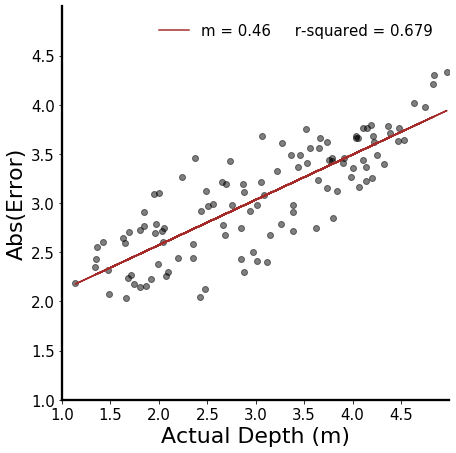

In [123]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)

#run regression
X = np.array(p_data_grouped['actual_depth']).reshape(-1,1)
y = np.array(p_data_grouped['abs_error'])


reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='brown', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

plt.tight_layout()    

plt.xticks(np.arange(1,5,0.5),fontsize=15)

plt.yticks(np.arange(1,5,0.5),fontsize=15)


plt.xlim(1,5)
plt.ylim(1,5)

plt.ylabel('Abs(Error)', fontsize=22)

plt.xlabel('Actual Depth (m)', fontsize=22)

legend = plt.legend(loc = 0, fontsize = 15, borderpad = 0.6, labelspacing = 1, frameon=False)

#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)



m: [0.04670801]
b: 0.4604774265532656
R-squared:  0.1462269701606549


0.146

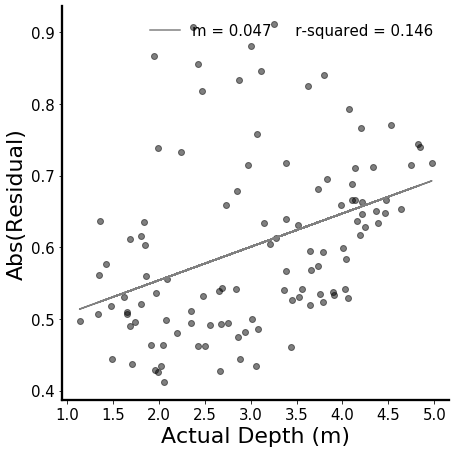

In [124]:
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[6,6])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2.3)

#run regression
X = np.array(p_data_grouped['actual_depth']).reshape(-1,1)
y = np.array(p_data_grouped['abs_s_residual'])


reg = LinearRegression().fit(X, y)

#Generated Predictions
y_predicted = reg.predict(X)
#Plot Our Actual and Predicted Values
plt.plot(X, y, 'o', color='black', alpha = 0.5);
plt.plot(X,y_predicted,color='gray', label = 'm = ' + str(round(reg.coef_[0], 3))
         + '     r-squared = ' + str(round(float(reg.score(X, y)), 3)))

plt.tight_layout()    

plt.xticks(fontsize=15)

plt.yticks(fontsize=15)


plt.ylabel('Abs(Residual)', fontsize=22)

plt.xlabel('Actual Depth (m)', fontsize=22)

legend = plt.legend(loc = 0, fontsize = 15, borderpad = 0.6, labelspacing = 1, frameon=False)

#get coefficients and y intercept
print("m: {0}".format(reg.coef_))
print("b: {0}".format(reg.intercept_))

#Returns the coefficient of determination R^2 of the prediction.
print("R-squared: ", reg.score(X, y))

round(float(reg.score(X, y)), 3)